# Use GANs to Create Art - Monet Generator

## Project Background

Artists are known for their unique styles, like their choice of colors or brush strokes. Thanks to generative adversarial networks (GANs), the unique styles of artists like Claude Monet can now be imitated by algorithms. In this competition, participants will apply these styles to their photos or create them from scratch.

Computer vision has made significant progress, and GANs can now convincingly mimic objects. Creating masterpieces is usually seen as more art than science. But can GANs, a form of data science, fool classifiers into thinking a piece is a real Monet? That's the challenge here.

### Modeling overview
A GAN uses at least two neural networks: a generator and a discriminator. The generator creates images and in this competition, it will generate images in the style of Monet. The discriminator helps train the generator by trying to distinguish between real and generated images.

This notebook will build a GAN that generates 7,000 to 10,000 images in Monet's style. The generator will try to create convincing images, while the discriminator will try to tell them apart from real ones.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
# set up kaggel connection
!pip install --upgrade pip
!pip install kaggle --upgrade
!pip install kaggledatasets --upgrade

In [3]:
# upload your Kaggle credentials from kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aminteer","key":"0eeb972e048d0b24288b108c4021e611"}'}

In [4]:
# move and modify kaggle.json file
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           4486         86  1.0              
devarajv88/walmart-sales-dataset                                e-Commerce (Walmart) Sales Dataset                 5MB  2024-05-30 12:09:55           2565         37  1.0              
nuhmanpk/india-lok-sabha-election-results-2024                  Lok Sabha Election Results 2024 India             20KB  2024-06-05 05:49:01           1160         30  1.0              
ayushparwal2026/country-population-from-1960-to-2022            Country Pop

In [6]:
!kaggle competitions download -c gan-getting-started

 99% 362M/367M [00:09<00:00, 36.5MB/s]
100% 367M/367M [00:09<00:00, 42.2MB/s]


In [7]:
! mkdir train
! unzip gan-getting-started.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/photo_jpg/46e84039a1.jpg  
  inflating: train/photo_jpg/46f391abec.jpg  
  inflating: train/photo_jpg/46f5ef1042.jpg  
  inflating: train/photo_jpg/4706619607.jpg  
  inflating: train/photo_jpg/4707b03a08.jpg  
  inflating: train/photo_jpg/47100a9939.jpg  
  inflating: train/photo_jpg/471f4755b9.jpg  
  inflating: train/photo_jpg/472b351bc4.jpg  
  inflating: train/photo_jpg/472d5ac100.jpg  
  inflating: train/photo_jpg/4758e5dd4c.jpg  
  inflating: train/photo_jpg/4762bb79ef.jpg  
  inflating: train/photo_jpg/4778b13518.jpg  
  inflating: train/photo_jpg/4787b82d37.jpg  
  inflating: train/photo_jpg/478e07feaa.jpg  
  inflating: train/photo_jpg/478eb12a82.jpg  
  inflating: train/photo_jpg/479698b371.jpg  
  inflating: train/photo_jpg/4796d67f61.jpg  
  inflating: train/photo_jpg/47aad493bd.jpg  
  inflating: train/photo_jpg/47ae0edd23.jpg  
  inflating: train/photo_jpg/47b94957ff.jpg  
  inflating: train/photo_jpg/

### Library and notebook setup
Setup up tensorflow library and check on TPU environment

Need to install tf 2.8.0 to get the code to work

In [8]:
!pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: 

Now, need to reinstall Keras at appropriate version

In [9]:
!pip install --upgrade keras==2.8.0

In [10]:
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.2 MB/s eta 0:00:00


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

#from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import numpy as np

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

AUTOTUNE = tf.data.experimental.AUTOTUNE

print(tf.__version__)

Number of replicas: 1
2.8.0


## Load data
### About the data
The data is sourced from the TFRecord dataset.  All the images are already sized to 256x256. They are RGB images so the channel is set to 3. The images will be scaled to a [-1, 1] scale. Because this notebook builds a generative model, the labels and the image id are not needed so will not be loaded.

In [17]:
IMAGE_SIZE = [256, 256]

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

In [18]:
def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [19]:
#GCS_PATH = KaggleDatasets().get_gcs_path()
GCS_PATH = ""

# file path: /content/train/monet_jpg

In [21]:
MONET_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/content/train/monet_tfrec/*.tfrec'))
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/content/train/photo_tfrec/*.tfrec'))
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

Monet TFRecord Files: 5
Photo TFRecord Files: 20


In [22]:
monet_ds = load_dataset(MONET_FILENAMES, labeled=True).batch(1)
photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1)

In [23]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

Show a few examples of the images

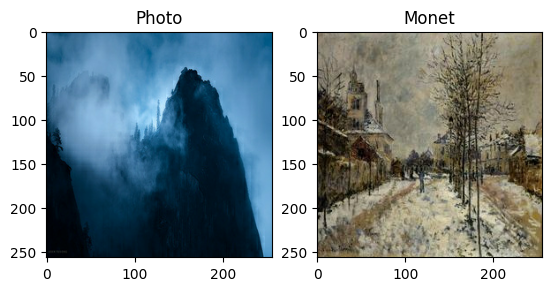

In [24]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)

## GAN Model Building

To operate as adverserial networks, two networks must be constructed to operate against each other.  The generator network will be built first.  The structure of this GAN is called CycleGAN.

Two helper functions of downsample and upsample create layers that manipulate the images.  These are created first.

In [25]:
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(layers.LeakyReLU())

    return result

In [26]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

Building the generator network

In [27]:
def Generator():
    inputs = layers.Input(shape=[256,256,3])

    # bs = batch size
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 128, 128, 64)
        downsample(128, 4), # (bs, 64, 64, 128)
        downsample(256, 4), # (bs, 32, 32, 256)
        downsample(512, 4), # (bs, 16, 16, 512)
        downsample(512, 4), # (bs, 8, 8, 512)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(512, 4), # (bs, 2, 2, 512)
        downsample(512, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4), # (bs, 16, 16, 1024)
        upsample(256, 4), # (bs, 32, 32, 512)
        upsample(128, 4), # (bs, 64, 64, 256)
        upsample(64, 4), # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return keras.Model(inputs=inputs, outputs=x)

Build the Discriminator Network

In [28]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

In [29]:
with strategy.scope():
    monet_generator = Generator() # transforms photos to Monet-esque paintings
    photo_generator = Generator() # transforms Monet paintings to be more like photos

    monet_discriminator = Discriminator() # differentiates real Monet paintings and generated Monet paintings
    photo_discriminator = Discriminator() # differentiates real photos and generated photos

Test the untrained networks - nothing meaningful should be generated as the GAN has not been trained yet

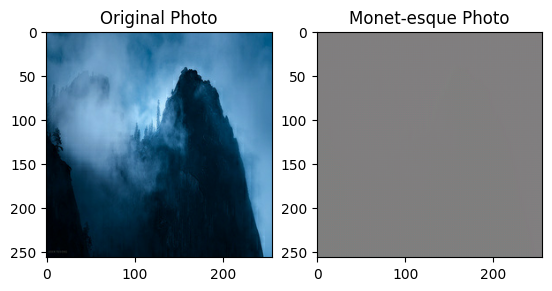

In [30]:
to_monet = monet_generator(example_photo)

plt.subplot(1, 2, 1)
plt.title("Original Photo")
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-esque Photo")
plt.imshow(to_monet[0] * 0.5 + 0.5)
plt.show()

Build the CycleGAN using the previously created Generator and Discriminator networks

In [31]:
class CycleGan(keras.Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle

    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn

    def train_step(self, batch_data):
        real_monet, real_photo = batch_data

        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                                  self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)

        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                                      self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                 self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))

        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                  self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))

        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }

Define the loss functions to use for the CycleGAN

In [32]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

        generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5

In [33]:
with strategy.scope():
    def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

Calculate the Cycle consistency loss

In [34]:
with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

        return LAMBDA * loss1

Compare the input with the output to calcuate the identity loss

In [35]:
with strategy.scope():
    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

## Model training

In [36]:
with strategy.scope():
    monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [37]:
with strategy.scope():
    cycle_gan_model = CycleGan(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )

In [38]:
history = cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=1 # 25
)

300/300 [==============================] - 2805s 9s/step - monet_gen_loss: 5.2624 - photo_gen_loss: 5.3886 - monet_disc_loss: 0.6434 - photo_disc_loss: 0.6262


### Analyze the loss

In [42]:
print(history.history.keys()  )
print("monet_gen_loss: ", history.history['monet_gen_loss'])
print("monet_disc_loss: ", history.history['monet_disc_loss'])
print("monet_disc_loss: ", history.history['monet_disc_loss'])
print("photo_disc_loss: ", history.history['photo_disc_loss'])

dict_keys(['monet_gen_loss', 'photo_gen_loss', 'monet_disc_loss', 'photo_disc_loss'])
monet_gen_loss:  [array([[[2.9824765, 2.9541383, 2.9435096, 2.9329283, 2.9338787,
         2.9345095, 2.9344873, 2.9343116, 2.9342241, 2.9341393,
         2.9340134, 2.9337692, 2.9335747, 2.933375 , 2.9329524,
         2.9322731, 2.931651 , 2.9314413, 2.931474 , 2.9320686,
         2.9331117, 2.9357584, 2.9360018, 2.9339666, 2.933649 ,
         2.9332545, 2.9321082, 2.9371212, 2.9438224, 2.9803338],
        [2.9523327, 2.9112482, 2.8978372, 2.8846667, 2.8861916,
         2.8871944, 2.8872783, 2.8871953, 2.8873026, 2.8874435,
         2.8873863, 2.8871737, 2.8869696, 2.886732 , 2.885889 ,
         2.8849826, 2.8866706, 2.8922887, 2.8988745, 2.9030285,
         2.9022593, 2.9021297, 2.8968444, 2.888925 , 2.8870637,
         2.8862228, 2.8844335, 2.8905396, 2.897405 , 2.9495435],
        [2.9242897, 2.8777547, 2.8631847, 2.8503084, 2.852157 ,
         2.8534667, 2.8539007, 2.8542101, 2.8547254, 2.8552747

In [52]:
# grab just the first value in each array of monet_gen_loss history which has shape [1,1,30,30]
monet_gen_loss_simple = np.array([x[0][0] for x in history.history['monet_gen_loss']])
photo_gen_loss_simple = np.array([x[0][0] for x in history.history['photo_gen_loss']])
monet_disc_loss_simple = np.array([x[0][0] for x in history.history['monet_disc_loss']])
photo_disc_loss_simple = np.array([x[0][0] for x in history.history['photo_disc_loss']])

print(monet_gen_loss_simple)
# print the shape of monet_gen_loss_simple



[[2.9824765 2.9541383 2.9435096 2.9329283 2.9338787 2.9345095 2.9344873
  2.9343116 2.9342241 2.9341393 2.9340134 2.9337692 2.9335747 2.933375
  2.9329524 2.9322731 2.931651  2.9314413 2.931474  2.9320686 2.9331117
  2.9357584 2.9360018 2.9339666 2.933649  2.9332545 2.9321082 2.9371212
  2.9438224 2.9803338]]


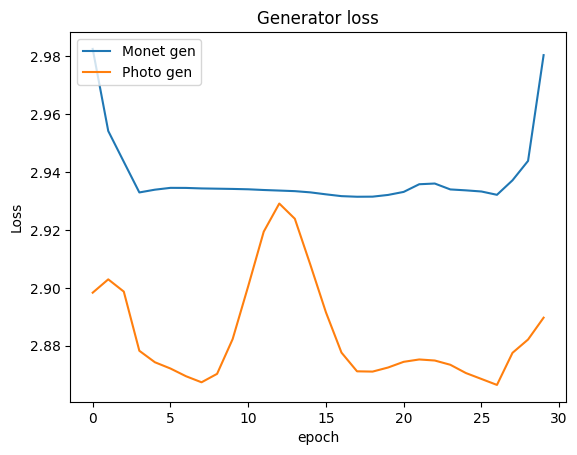

In [53]:
import matplotlib.pyplot as plt

# summarize history for generator loss
#plt.plot(history.history['monet_gen_loss'])
plt.plot(monet_gen_loss_simple[0])
#plt.plot(history.history['photo_gen_loss'])
plt.plot(photo_gen_loss_simple[0])
plt.title('Generator loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Monet gen', 'Photo gen'], loc='upper left')
plt.show()



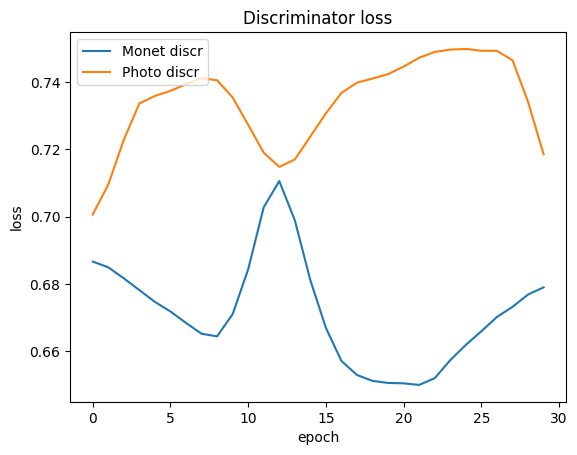

In [54]:
# summarize history for discriminator loss
#plt.plot(history.history['monet_disc_loss'])
plt.plot(monet_disc_loss_simple[0])
#plt.plot(history.history['photo_disc_loss'])
plt.plot(photo_disc_loss_simple[0])
plt.title('Discriminator loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Monet discr', 'Photo discr'], loc='upper left')
plt.show()

## Show some results
Review how well the generated Monet-style images are produced.

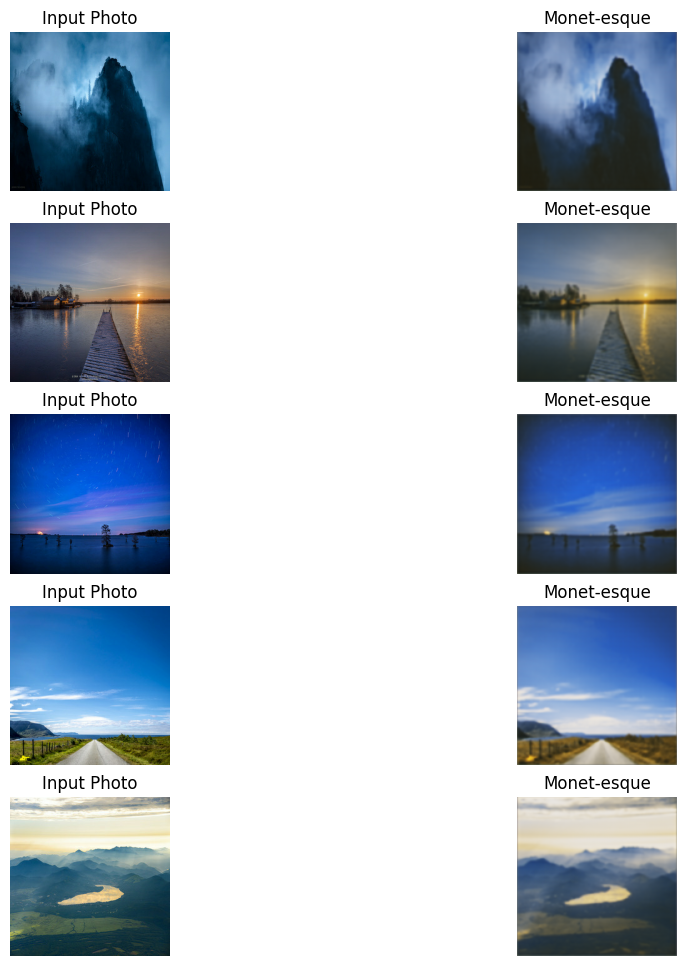

In [55]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

## Conclusions and Analysis
Results are impressive for a first iteration run.  More hyperparameter tuning on loss parameters and methods could be performed to improve results.  Altering the structure with more or less layers in the generator and discriminator models may also lead to improvement.

## Generate Submission

In [ ]:
import PIL
! mkdir ../images

i = 1
for img in photo_ds:
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(prediction)
    im.save("../images/" + str(i) + ".jpg")
    i += 1

In [ ]:
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")

In [ ]:
# Submit
!kaggle competitions submit -c gan-getting-started -f images.zip -m "submission 1"

In [ ]:
# Check results
!kaggle competitions submissions -c gan-getting-started

## Attributions
Kaggle interaction code: https://www.kaggle.com/code/code1110/how-to-submit-from-google-colab
Kaggle datasets and interactions: https://heads0rtai1s.github.io/2021/08/24/colab-plus-kaggle-cloud-gpu/
Monet CycleGAN Tutorial: https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial
Submissions walkthrough: https://stackoverflow.com/questions/60913726/submitting-results-to-kaggle-competition-from-command-line-regardless-of-kernel

